In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Correlation:  -0.017149012973395047


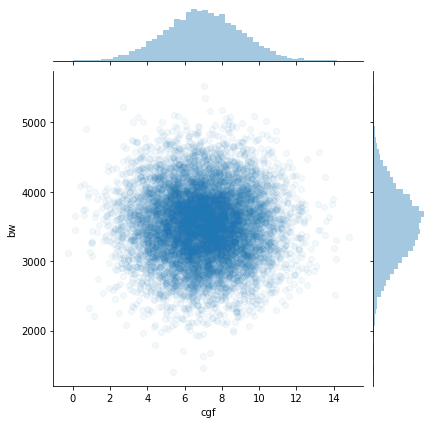

In [15]:
def check_correlation(sample_size=10000, 
                      p_malnourished=0.1,
                      mm_bw_effect=140, #250 from feb 2020, #140 from summer 2020
                      mm_cgf_effect=0.3):
    
    mom_malnourished = np.random.choice([1, 0], 
                                        size=sample_size, 
                                        p=[p_malnourished, 1-p_malnourished]).astype(bool)
    
    cgf_mean = 7
    cgf_sd = 2
    cgf_no_effect = np.random.normal(loc=cgf_mean, 
                                     scale=cgf_sd, 
                                     size=sample_size)
    
    cgf_effect = np.random.normal(loc=cgf_mean + mm_cgf_effect, 
                                  scale=cgf_sd, 
                                  size=sample_size)
    
    cgf = np.where(mom_malnourished, cgf_effect, cgf_no_effect)
    
    bw_mean = 3500
    
    bw_sd = 500
    
    bw_no_effect = np.random.normal(loc=bw_mean, 
                                    scale=bw_sd, 
                                    size=sample_size)
    bw_effect = np.random.normal(loc=bw_mean + mm_bw_effect, 
                                 scale=bw_sd, 
                                 size=sample_size)
    
    bw = np.where(mom_malnourished, bw_effect, bw_no_effect)
    
    df = pd.DataFrame({'cgf': cgf, 'bw': bw, 'mom_malnourished': mom_malnourished})
    
    print('Correlation: ', np.corrcoef(cgf, bw)[0][1])
    
    sns.jointplot(x='cgf', y='bw', alpha=0.05, data=df)
    plt.show()
    
check_correlation()